In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# lee las dos bases de datos que empiezan con IPH_robos_2021 y IPH_robos_2024
df1 = pd.read_excel("data/fechas_corregidas.xlsx")
df2 = pd.read_excel("data/IPH_robos_ene-ago-2025_tecmty.xlsx")


In [14]:
# En df2 cambia el nombre de la columna VOLENCIA a VIOLENCIA
df2.rename(columns={'VOLENCIA': 'VIOLENCIA'}, inplace=True)

In [15]:
# Une las dos bases de datos
df = pd.concat([df1, df2], ignore_index=True)

In [16]:
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,dia
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,NaN
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,NaN
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,NaN
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,NaN
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,NaN


In [17]:
df.dtypes

FOLIO                 int64
FECHA        datetime64[ns]
HORA                  int64
MINUTO                int64
TIPO                 object
VIOLENCIA            object
LATITUD             float64
LONGITUD            float64
DISTRITO             object
CUADRANTE             int64
dia                 float64
dtype: object

In [19]:
# Eliminar la columna de dia
df.drop(columns=['dia'], inplace=True)


In [20]:
df.isnull().sum()

FOLIO        0
FECHA        0
HORA         0
MINUTO       0
TIPO         0
VIOLENCIA    0
LATITUD      0
LONGITUD     0
DISTRITO     0
CUADRANTE    0
dtype: int64

In [21]:
df.duplicated(subset=['FOLIO']).sum()

np.int64(726)

In [22]:
df[df.duplicated(subset=['FOLIO'], keep=False)].sort_values(by='FOLIO')

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE
6201,0,2022-07-28,18,12,ROBO A CASA HABITACION,NO,28.619656,-106.105090,Diana,32
6190,0,2022-07-27,15,19,ROBO DE VEHICULO,NO,28.645297,-106.013942,Morelos,52
6191,0,2022-07-27,20,43,ROBO A NEGOCIO,SI,28.625491,-106.061615,Zapata,70
6192,0,2022-07-28,3,41,ROBO A CASA HABITACION,SI,28.723154,-106.108071,Colón,14
6193,0,2022-07-28,8,3,ROBO DE VEHICULO,NO,28.722476,-106.152428,Colón,12
...,...,...,...,...,...,...,...,...,...,...
5735,0,2022-04-29,13,48,ROBO A NEGOCIO,SI,28.603076,-106.037704,Morelos,55
7995,1269942,2022-10-23,0,28,ROBO A NEGOCIO,SI,28.651858,-106.062341,Ángel,35
12134,1269942,2025-08-02,4,16,ROBO A NEGOCIO,SI,28.725176,-106.122496,Colón,13
8655,1342626,2021-03-30,15,8,ROBO A NEGOCIO,NO,28.730855,-106.113343,Colón,14


In [23]:
df['HORA'].describe()

count    12266.000000
mean        15.769933
std         17.883901
min          0.000000
25%          8.000000
50%         12.000000
75%         18.000000
max         99.000000
Name: HORA, dtype: float64

In [24]:
df['MINUTO'].describe()

count    12266.000000
mean        31.759498
std         21.877397
min          0.000000
25%         15.000000
50%         30.000000
75%         46.000000
max         99.000000
Name: MINUTO, dtype: float64

In [25]:
df['TIPO'].describe()

count              12266
unique                 3
top       ROBO A NEGOCIO
freq                5610
Name: TIPO, dtype: object

In [26]:
df['TIPO'].unique()

array(['ROBO A CASA HABITACION', 'ROBO DE VEHICULO', 'ROBO A NEGOCIO'],
      dtype=object)

In [28]:
df['VIOLENCIA'].unique()

array(['NO', 'SI'], dtype=object)

In [30]:
df['AÑO'] = pd.DatetimeIndex(df['FECHA']).year
df['MES'] = pd.DatetimeIndex(df['FECHA']).month
df['DIA'] = pd.DatetimeIndex(df['FECHA']).day
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,AÑO,MES,DIA
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,2024,1,1
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,2024,1,1
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,2024,1,1
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,2024,1,1
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,2024,1,1


In [31]:
df[df['TIPO'] == 'ROBO A NEGOCIO'].groupby('DISTRITO').size().sort_values(ascending=False)

DISTRITO
Villa      1304
Colón      1123
Morelos    1114
Zapata     1024
Diana       579
Ángel       466
dtype: int64

In [32]:
df.groupby(['DISTRITO', 'TIPO']).size().unstack(fill_value=0)

TIPO,ROBO A CASA HABITACION,ROBO A NEGOCIO,ROBO DE VEHICULO
DISTRITO,,,
Colón,633,1123,800
Diana,180,579,285
Morelos,1068,1114,782
Villa,601,1304,782
Zapata,520,1024,630
Ángel,83,466,292


<Axes: xlabel='DISTRITO', ylabel='TOTAL'>

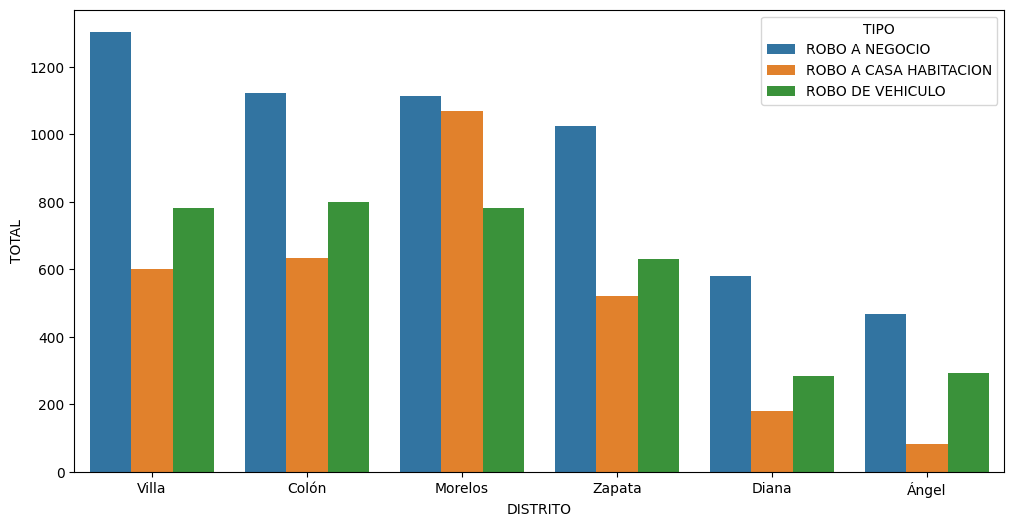

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(['DISTRITO', 'TIPO']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False).head(20), x='DISTRITO', y='TOTAL', hue='TIPO')

Text(0.5, 1.0, 'Total de robos por mes y tipo')

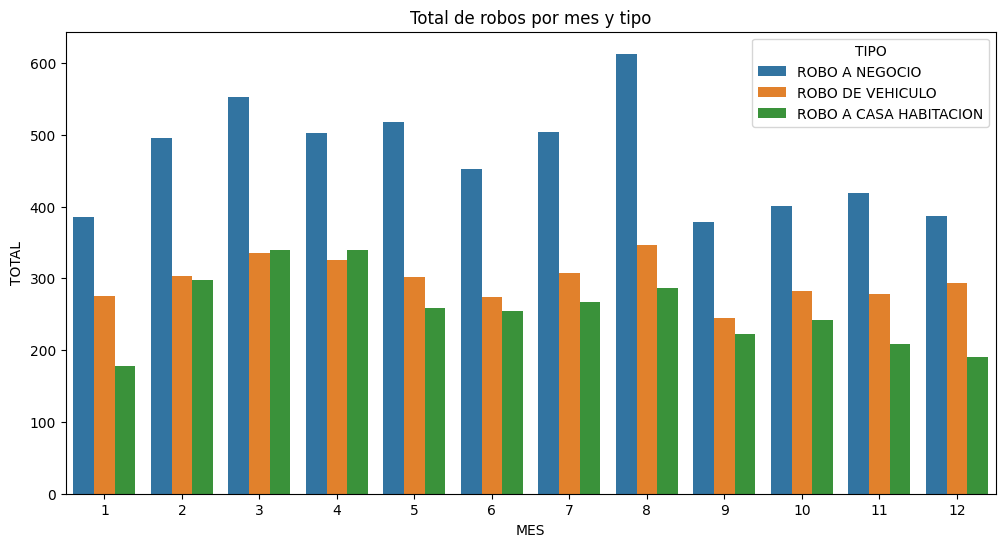

In [34]:
# Agrupamos por MES y TIPO y contamos el total de registros y graficamos un barplot
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(['MES', 'TIPO']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False), x='MES', y='TOTAL', hue='TIPO')
plt.title('Total de robos por mes y tipo')

Text(0.5, 1.0, 'Total de robos por hora y tipo')

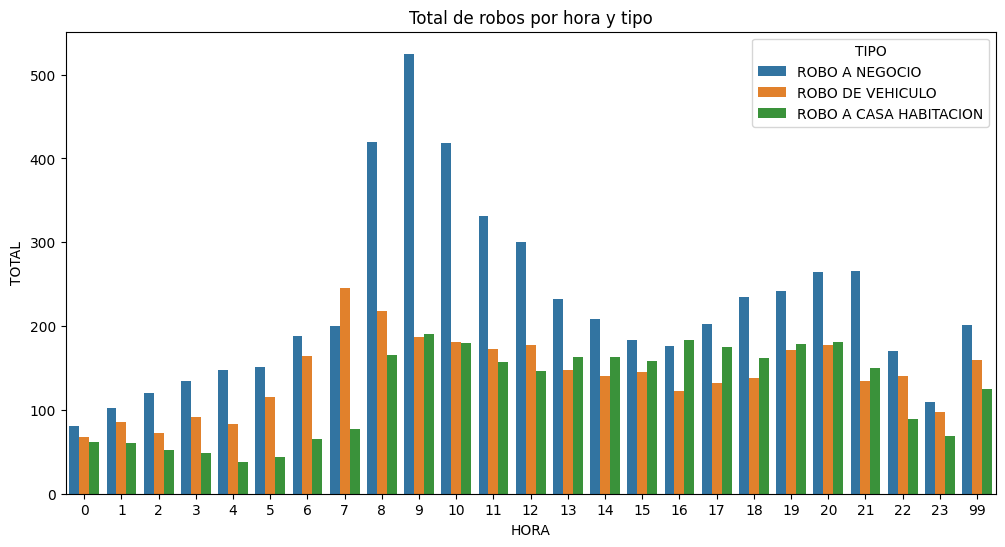

In [35]:
# Agrupamos por HORA y TIPO y contamos el total de registros y graficamos un barplot
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(['HORA', 'TIPO']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False), x='HORA', y='TOTAL', hue='TIPO')
plt.title('Total de robos por hora y tipo')

In [37]:
df['VIOLENCIA'].value_counts()

VIOLENCIA
NO    10248
SI     2018
Name: count, dtype: int64

Text(0.5, 1.0, 'Total de robos por dia de la semana y tipo')

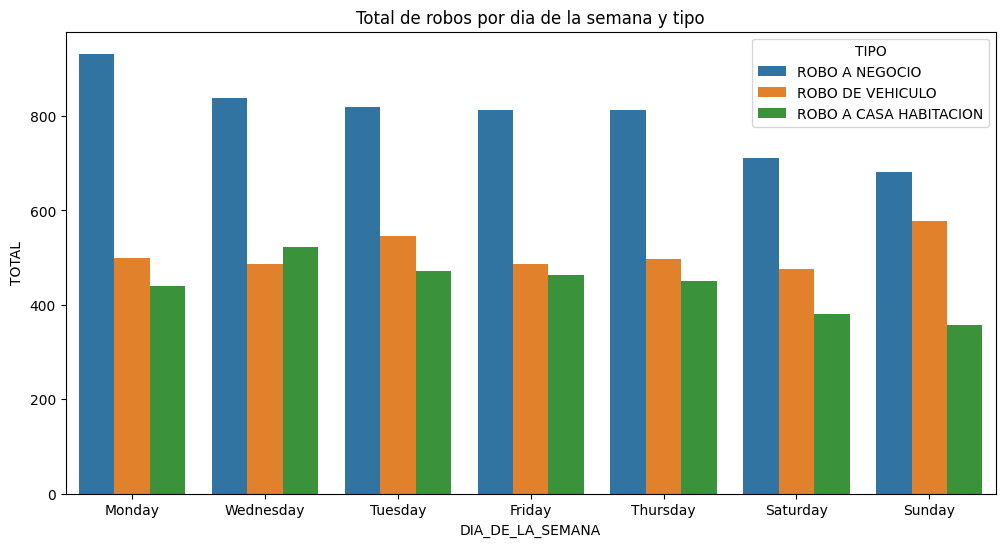

In [39]:
df['DIA_DE_LA_SEMANA'] = df['FECHA'].dt.day_name()
# Agrupar DIA DE LA SEMANA y TIPO y contamos el total de registros y graficamos un barplot
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(['DIA_DE_LA_SEMANA', 'TIPO']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False), x='DIA_DE_LA_SEMANA', y='TOTAL', hue='TIPO')
plt.title('Total de robos por dia de la semana y tipo')

Text(0.5, 1.0, 'Total de robos por hora y violencia')

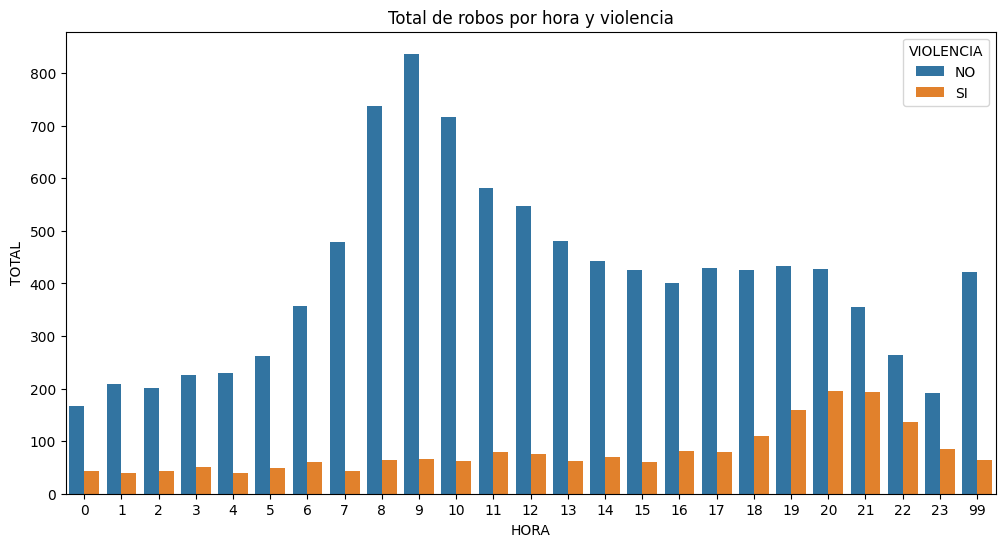

In [40]:
# Agrupar HORA y VIOLENCIA y contamos el total de registros y graficamos un barplot
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby(['HORA', 'VIOLENCIA']).size().reset_index(name='TOTAL').sort_values(by='TOTAL', ascending=False), x='HORA', y='TOTAL', hue='VIOLENCIA')
plt.title('Total de robos por hora y violencia')

In [41]:
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,AÑO,MES,DIA,DIA_DE_LA_SEMANA
0,3196367,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.719604,-106.142035,Colón,12,2024,1,1,Monday
1,3196186,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.717739,-106.089196,Colón,15,2024,1,1,Monday
2,3196158,2024-01-01,99,99,ROBO A CASA HABITACION,NO,28.646452,-106.057703,Ángel,35,2024,1,1,Monday
3,3195958,2024-01-01,99,99,ROBO A NEGOCIO,NO,28.621036,-106.030771,Zapata,77,2024,1,1,Monday
4,3195921,2024-01-01,99,99,ROBO DE VEHICULO,NO,28.602171,-105.992235,Morelos,57,2024,1,1,Monday


- Total de robos por cuadrante
- Total de robos a negocio por cuadrante
- Total de robo a casa habitación por cuadrante
- Total de robo a vehículo por cuadrante
- Total de robos por mes
- Total de robo a negocio por mes
- Total de robo a casa habitaci´n por mes
- Total de robo a vehículo por mes
- Total de robos por primavera
- Total de robos por negocio por primavera
- Desglosar lo anterior por estación del año, cuadrante y tipo de robo con y sin violencia

In [ ]:
# Crear la columna 